In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install pyarrow

In [ ]:
all_data = pd.read_feather(r'/Users/xiao/Downloads/data project/ecommer_analysis/Sales_data.ftr')

In [ ]:
all_data = all_data.dropna(how = 'all')

In [ ]:
all_data = all_data.drop_duplicates()

In [ ]:
month =[]
for date in all_data['Order Date']:
    month.append(date.split(' ')[0].split('/')[0])

In [ ]:
all_data['Month'] = month

In [ ]:
filter1 = all_data['Month'] == "Order"
all_data = all_data[~filter1]

In [ ]:
all_data['Month'] = all_data['Month'].astype(int)
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['Price Each'] = all_data['Price Each'].astype(float)

In [ ]:
all_data['sale'] = all_data['Quantity Ordered'] * all_data['Price Each']

<Axes: xlabel='Month'>

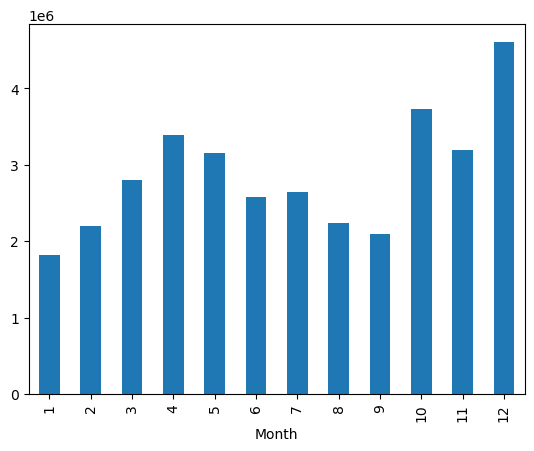

In [65]:
all_data.groupby(['Month'])['sale'].sum().plot(kind='bar')

In [73]:
def return_city(x):
    return x.split(',')[1]
all_data['city'] = all_data['Purchase Address'].apply(return_city)

<Axes: ylabel='sale'>

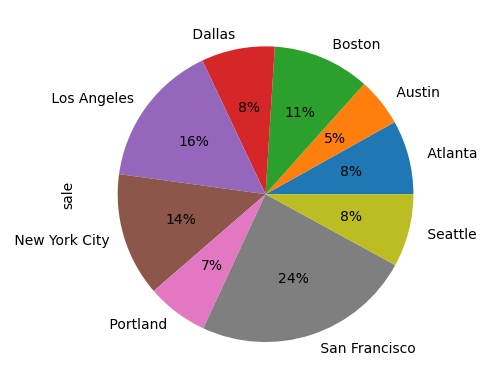

In [78]:
all_data.groupby(['city'])['sale'].sum().plot(kind = 'pie', autopct ='%1.0f%%')

In [103]:
product_df = all_data.groupby(['Product']).agg({'Quantity Ordered':'sum', 'Price Each':'mean'}).sort_values(['Quantity Ordered'],ascending=False)

In [106]:
product_df = product_df.reset_index()

/var/folders/hm/myxdjkbj4m72k1qm3y62ky5h0000gn/T/ipykernel_62388/467903688.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels( product_df['Product'], rotation = 90)


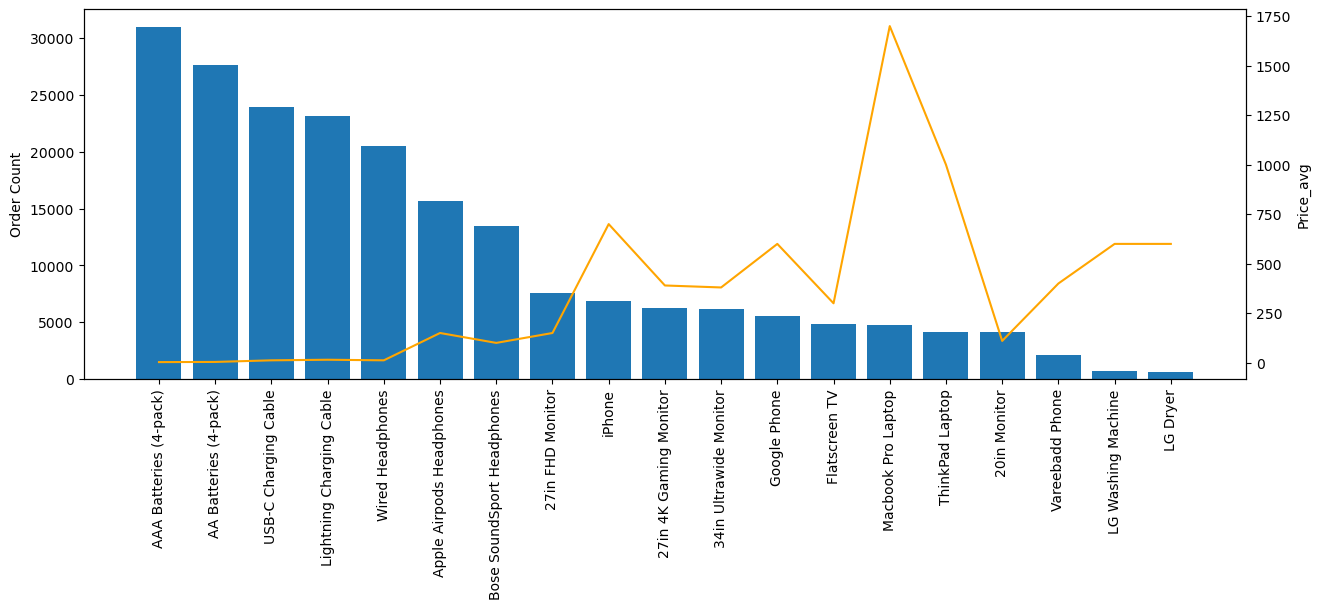

In [125]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(product_df['Product'], product_df['Quantity Ordered'])
ax2.plot(product_df['Product'],product_df['Price Each'], color ='orange')
ax1.set_xticklabels( product_df['Product'], rotation = 90)
ax1.set_ylabel('Order Count')
ax2.set_ylabel('Price_avg')
fig.set_figwidth(15)


In [142]:
most_sold_product = product_df[0:5]['Product']

In [144]:
most_sold_df = all_data[all_data['Product'].isin(most_sold_product)]

In [148]:
pivot = most_sold_df.groupby(['Month','Product']).size().unstack()

<Axes: xlabel='Month'>

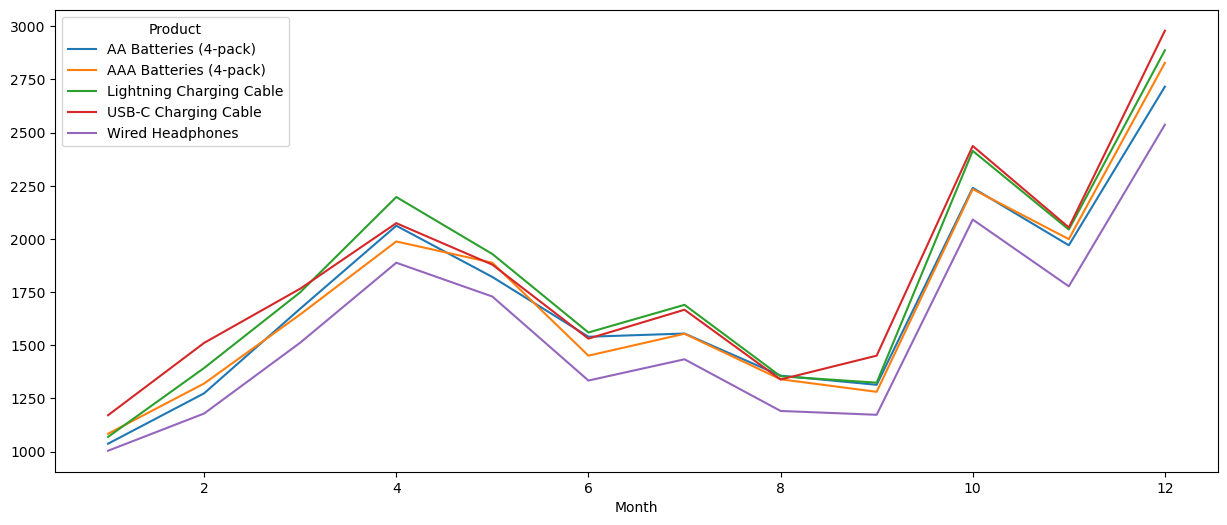

In [153]:
pivot.plot(figsize=(15,6))

In [194]:
df_duplicated = all_data[all_data['Order ID'].duplicated(keep = False)]

In [195]:
grouped = df_duplicated.groupby(['Order ID'])['Product'].apply(lambda x:','.join(x)).reset_index().rename(columns = {'Product':'Grouped_products'})

In [196]:
grouped_df = grouped.merge(df_duplicated, how='left', on ='Order ID')

In [197]:
grouped_df = grouped_df.drop_duplicates(subset= ['Order ID'])

<Axes: ylabel='count'>

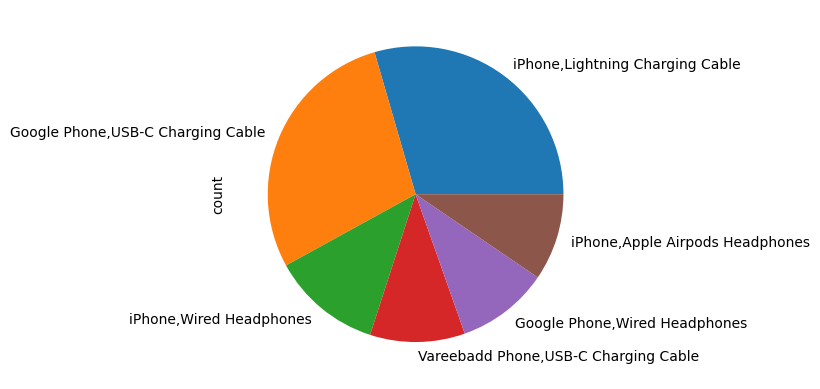

In [200]:
grouped_df['Grouped_products'].value_counts()[0:6].plot.pie()